## Criação de operadores

In [33]:
# Pauli - Z,X,Y,I

from qiskit.quantum_info import Pauli

X = Pauli('X')
XX = Pauli('XX') # X tensor X
iX = Pauli('iX') # i*X

print(f"X:\n {X.to_matrix()} \nX tensor X:\n {XX.to_matrix()} \ni*X:\n {iX.to_matrix()}")

X:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]] 
X tensor X:
 [[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]] 
i*X:
 [[0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j]]


In [37]:
# SparsePauliop

from qiskit.quantum_info import SparsePauliOp

X = SparsePauliOp(['X'])
XX = SparsePauliOp(['XX']) # X tensor X
X_X = SparsePauliOp(['X','X']) # X + X
iX = SparsePauliOp(['X'], coeffs=[1j]) # i*X
XII = SparsePauliOp.from_sparse_list([(['X'], [2], 1)], num_qubits=3) # (["operadores"], "[index_qubits]", coeficiente)

print(f"X:\n {X.to_matrix()} \nX tensor X:\n {XX.to_matrix()} \nX+X:\n {X_X.to_matrix()} \ni*X:\n {iX.to_matrix()} \nXII:\n {XII.to_matrix()}")

X:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]] 
X tensor X:
 [[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]] 
X+X:
 [[0.+0.j 2.+0.j]
 [2.+0.j 0.+0.j]] 
i*X:
 [[0.+0.j 0.+1.j]
 [0.+1.j 0.+0.j]] 
XII:
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [43]:
# Operações entre operadores

from qiskit.quantum_info import SparsePauliOp

x = SparsePauliOp(['X'])
y = SparsePauliOp(['Y'])

print(x + y)
print(2*x)
print(x@y)  # x * y
print(x.tensor(y))

SparsePauliOp(['X', 'Y'],
              coeffs=[1.+0.j, 1.+0.j])
SparsePauliOp(['X'],
              coeffs=[2.+0.j])
SparsePauliOp(['Z'],
              coeffs=[0.+1.j])
SparsePauliOp(['XY'],
              coeffs=[1.+0.j])


In [52]:
# Operator

from qiskit.quantum_info import Operator
import numpy as np
XX = Operator(
    np.array(
        [
            [0, 0, 0, 1],
            [0, 0, 1, 0],
            [0, 1, 0, 0],
            [1, 0, 0, 0],
        ]
    )
)

# input e ouput dimensions = numero de qubits que entram e saem

print(XX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [53]:
# Passando um operador para as bases de Pauli

import numpy as np
from qiskit.quantum_info import SparsePauliOp
 
matrix = np.array(
    [[-1, 0, 0.5, -1], [0, 1, 1, 0.5], [0.5, 1, -1, 0], [-1, 0.5, 0, 1]]
)
 
observable = SparsePauliOp.from_operator(matrix)
print(observable)

SparsePauliOp(['IZ', 'XI', 'YY'],
              coeffs=[-1. +0.j,  0.5+0.j,  1. -0.j])


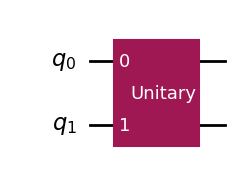

In [1]:
# Criando um operador unitario

import numpy as np
from qiskit import QuantumCircuit
 
U = 0.5 * np.array([
    [1, 1, 1, 1],
    [-1, 1, -1, 1],
    [-1, -1, 1, 1],
    [-1, 1, 1, -1]
])
 
circuit = QuantumCircuit(2)
circuit.unitary(U, circuit.qubits)
circuit.draw('mpl')